In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import math
import xlrd3

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
file_names_outdoor = np.array(['outdoor_16-2.csv', 'outdoor_8-1.csv', 'outdoor_8-2.csv', 'outdoor_8-4.csv', 'outdoor_4-2.csv', 'outdoor_4-3.csv'])
file_names_outdoor = np.char.add("outdoor/", file_names_outdoor)

In [3]:
def make_data_outdoor(file_path):
    return pd.read_csv(
        file_path,
        sep=';',                # Ensure correct delimiter
        decimal=',',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

In [4]:
data_array_outdoor = []
i = 0
for name in file_names_outdoor:
    data_array_outdoor.append(make_data_outdoor(name))
    i += 1
data_array_outdoor[0].head()
N = len(data_array_outdoor)

m = 20.24124111641165 * U + -2.9186518521095843


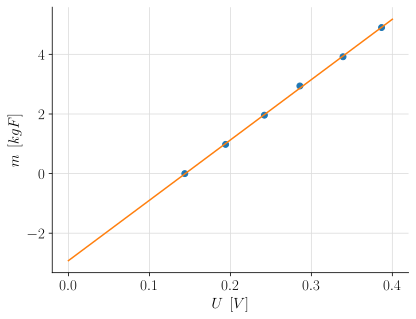

In [5]:
# калибровка тензодатчика
V = np.array([0, 1, 2, 3, 4, 5])
m = V * 980
U = np.array([143.7, 194.1, 242, 285.8, 339.1, 386.7])

fit_calibr = np.polyfit(U / 1000, m / 1000, 1)
x = np.array([0, 0.4])
y = fit_calibr[0] * x + fit_calibr[1]
print("m =", fit_calibr[0], "* U +", fit_calibr[1])

# график калибровки
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(U / 1000, m / 1000, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$m\:\:[kgF]$')
plt.grid(color='gainsboro')

p = 2.1327772720647955 * U + -4.255941865177047


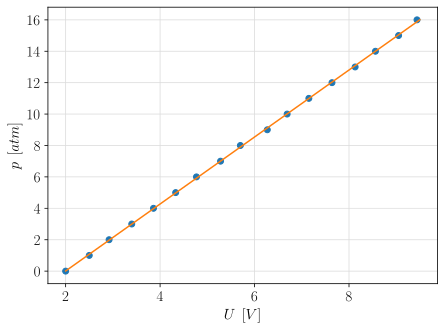

In [6]:
# калибровка давления
p = np.arange(0, 17, 1)
U = np.array([2, 2.50, 2.92, 3.40, 3.86, 4.33, 4.77, 5.28, 5.70, 6.27, 6.69, 7.15, 7.64, 8.13, 8.56, 9.05, 9.44])

fit_p_calibr = np.polyfit(U, p, 1)
x = np.array([2, 9.5])
y = fit_p_calibr[0] * x + fit_p_calibr[1]
print("p =", fit_p_calibr[0], "* U +", fit_p_calibr[1])

plt.plot(U, p, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$p\:\:[atm]$')
plt.grid(color='gainsboro')

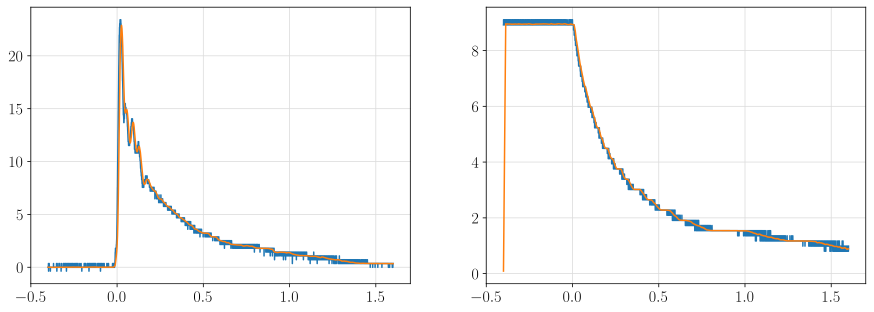

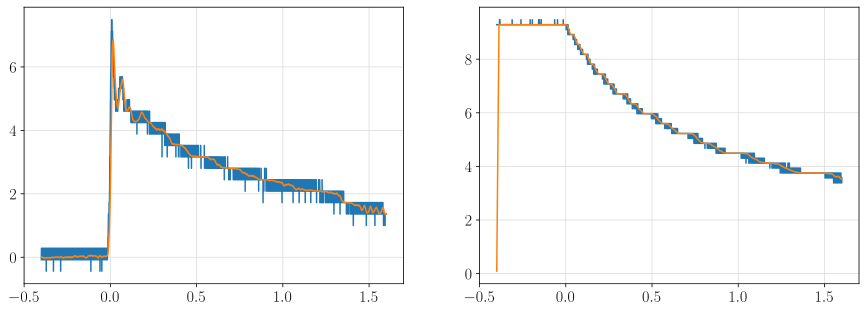

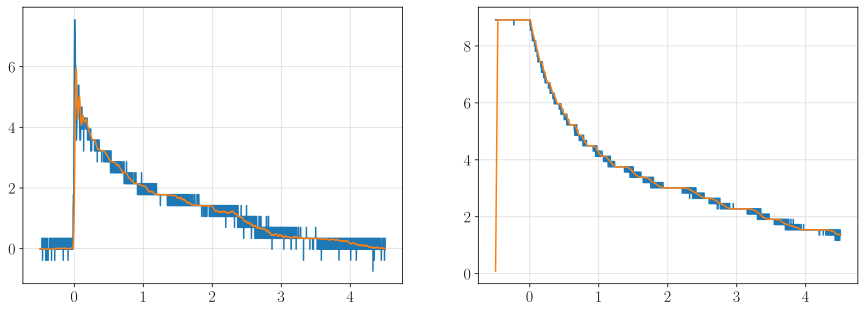

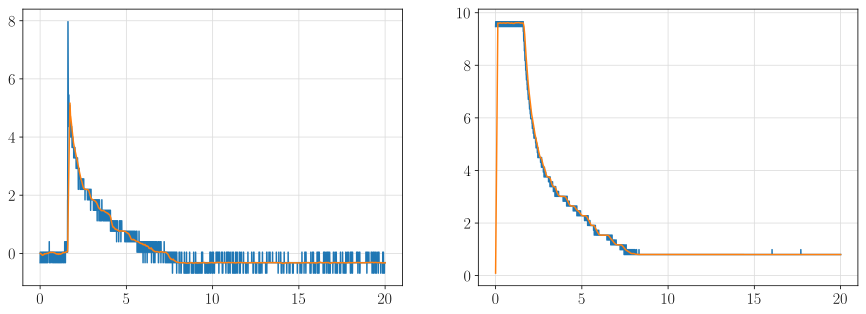

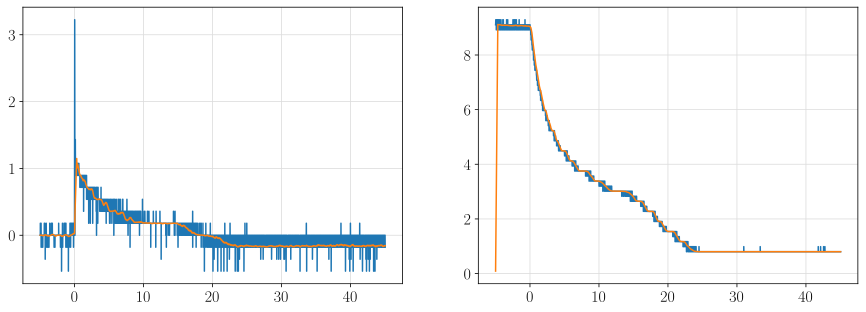

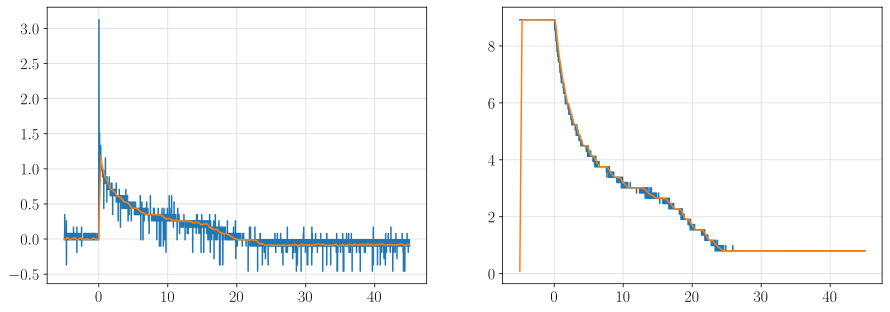

In [13]:
from scipy.signal import lfilter
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
# plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [15, 5]

time_data = []
F_exp = [] # exp - raw experimental data
p_exp = []

F_filtered_data = []
p_filtered_data = []

for i in range(N):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    time = np.array(data_array_outdoor[i].iloc[:, 0])
    time_data.append(time)
    
    U_F = np.array(data_array_outdoor[i].iloc[:, 1])
    if i == 5:
        U_F = U_F / 1000
    
    U_p = np.array(data_array_outdoor[i].iloc[:, 2])
    p = fit_p_calibr[0] * U_p + fit_p_calibr[1] + 1
    p_exp.append(p)

    ax2.plot(time, p)
    
    n = 100  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    n2 = 100
    b2 = [1.0 / n2] * n2
    a = 1
    U_F_filtered = lfilter(b, a, U_F)
    p_filtered = lfilter(b2, a, p)
    p_filtered_data.append(p_filtered)

    U_F_0 = U_F_filtered[500:1000].mean()
    F = fit_calibr[0] * (U_F - U_F_0)
    F_exp.append(F)

    F_filtered = lfilter(b, a, F)
    F_filtered_data.append(F_filtered)

    ax1.plot(time, F)
    ax1.plot(time, F_filtered)
    ax2.plot(time, p_filtered)
    
    ax1.grid(color='gainsboro')
    ax2.grid(color='gainsboro')


[array([1.97015578, 0.7533894 ]), array([0.66579694, 0.0120945 ]), array([0.6313468 , 0.02294003]), array([0.60154892, 0.180916  ]), array([ 0.17723758, -0.20755376]), array([ 0.14540079, -0.03139779])]


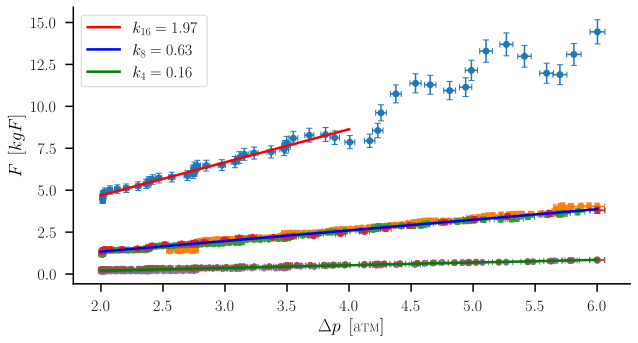

In [35]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', length=8, width=1.5, direction='out', pad=8)

fit_pF = []
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(N):
    p_start = 7 - 1
    p_end = 3 - 1

    p = p_filtered_data[i][500:] - 1
    F = F_filtered_data[i][500:]
    start = np.abs(p - p_start).argmin()
    end = np.abs(p - p_end).argmin()
    step_1 = 50
    # plt.plot(p[start:end:step_1], F[start:end:step_1], 'o') # , linewidth=1, linestyle='--'
    plt.errorbar(p[start:end:step_1], F[start:end:step_1], xerr=p[start:end:step_1]*0.01 ,yerr=F[start:end:step_1] * 0.05, fmt='o', capsize=3, zorder=i, color=colors[i % len(colors)])
    # plt.plot(p[start:end][800:], F[start:end][800:], linewidth=1, linestyle='--')
    if i == 0:
        fit_pF.append(np.polyfit(p[start:end][800:], F[start:end][800:], 1))
    elif i == 1:
        fit_pF.append(np.polyfit(p[start:end][:5500], F[start:end][:5500], 1))
    else:
        fit_pF.append(np.polyfit(p[start:end], F[start:end], 1))

print(fit_pF)

x = np.array([3 - 1, 5 - 1])
k_16 = fit_pF[0][0]
b_16 = fit_pF[0][1]
y_16 = k_16 * x + b_16
plt.plot(x, y_16, linewidth=2.5, label=r"$k_{}={}$".format({16}, round(k_16, 2)), zorder=i + 1, color='red')

x = np.array([3 - 1, 7 - 1])
k_8 = np.array([fit_pF[1][0], fit_pF[2][0], fit_pF[3][0]]).mean()
b_8 = np.array([fit_pF[1][1], fit_pF[2][1], fit_pF[3][1]]).mean()
k_4 = np.array([fit_pF[4][0], fit_pF[5][0]]).mean()
b_4 = np.array([fit_pF[4][1], fit_pF[5][1]]).mean()
y_8 = k_8 * x + b_8
y_4 = k_4 * x + b_4
plt.plot(x, y_8, linewidth=2.5, label=r"$k_{}={}$".format({8}, round(k_8, 2)), zorder=i + 2, color='blue')
plt.plot(x, y_4, linewidth=2.5, label=r"$k_{}={}$".format({4}, round(k_4, 2)), zorder=i + 3, color='green')

plt.xlabel('$\\Delta p\\:\\: [\\text{атм}]$')
plt.ylabel(r'$F\:\:[kgF]$')
plt.legend()

# plt.grid(color='gainsboro')

# plt.savefig("F_vs_p.pdf", bbox_inches='tight')
# plt.savefig("F_vs_p.svg", bbox_inches='tight')

In [37]:
S_16 = np.pi * (0.016)**2 / 4
S_8 = np.pi * (0.008)**2 / 4
S_4 = np.pi * (0.004)**2 / 4

In [38]:
mu_16 = (k_16 * 9.8 / 1e5 / (2 * S_16))**0.5
mu_16

0.692920483753269

In [39]:
mu_8 = (k_8 * 9.8 / 1e5 / (2 * S_8))**0.5
mu_8

0.7854703946956502

In [40]:
mu_4 = (k_4 * 9.8 / 1e5 / (2 * S_4))**0.5
mu_4

0.7931149214544

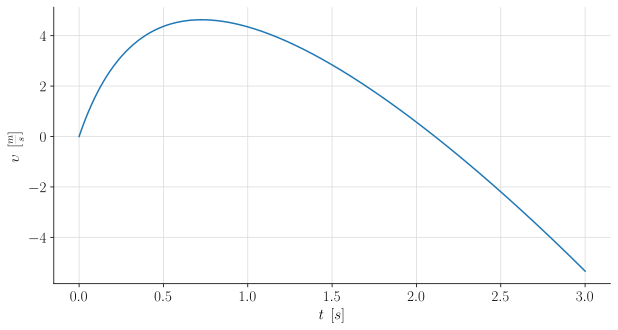

In [16]:
# моделирование уравнения Мещерского
from scipy.integrate import quad

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, mu, alpha, S):
    return 2 * mu**2 * S * (p(t, alpha) - p_a) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.4
S = S_8

N_step = 500
time = np.linspace(0, tau, num=N_step)
u = np.zeros(N_step)
for i in range(N_step):
    u[i], error = quad(du_dt, 0, time[i], args=(mu, alpha, S))

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

5.611647231599837


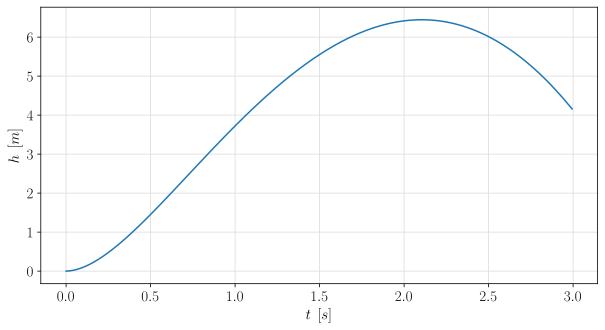

In [17]:
x = np.zeros(N_step - 1)
for i in range(1, N_step - 1):
    x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

plt.plot(time[:N_step - 1], x)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$h\:\:[m]$')
plt.grid(color='gainsboro')

print(x[-1] + u[-1]**2 / (2 * g))

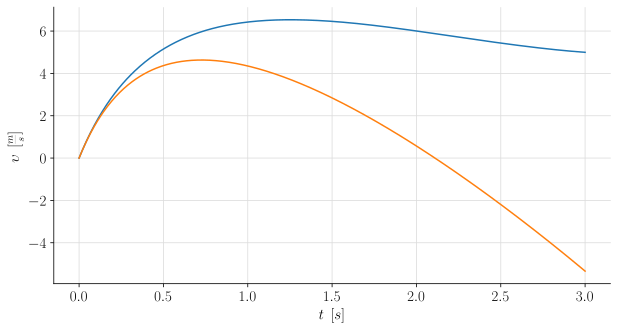

In [18]:
# моделирование уравнения Мещерского с силой сопротивления
from scipy.integrate import solve_ivp

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8
k = 1 / 2 * 1.25 * np.pi * (0.085 / 2)**2 * 0.3

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, u, mu, alpha, S):
    return (2 * mu**2 * S * (p(t, alpha) - p_a) - k * u**2) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.2
S = S_8

# Начальные условия
t0 = 0
u0 = 0
N_step = 500

t_span = (t0, 3)
t_eval = np.linspace(t0, 3, N_step)

solution = solve_ivp(du_dt, t_span, [u0], args=(mu, alpha, S), t_eval=t_eval)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(solution.t, solution.y[0])
plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

In [19]:
def make_data_8_4(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

data_8_4 = make_data_8_4('pV_8-4_1.csv')
time_exp_8_4 = np.array(data_8_4.iloc[:, 0])
U_p_exp_8_4 = np.array(data_8_4.iloc[:, 2])
p_exp_8_4 = fit_p_calibr[0] * (U_p_exp_8_4 - 1.76)
p_exp_8_4[1000:2000].mean()

6.487975669698504

C:\Users\Artno\AppData\Local\Temp\ipykernel_10180\2568587570.py:22: RuntimeWarning: invalid value encountered in sqrt
  return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5


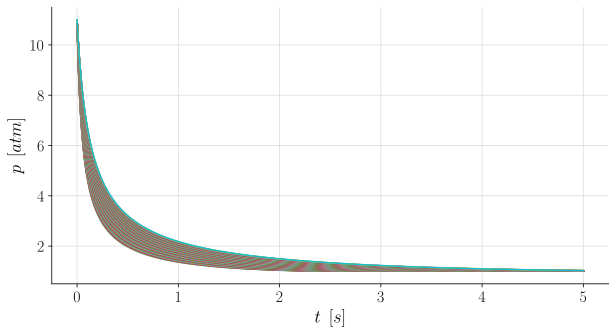

In [41]:
# моделирование уравнения Мещерского
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

p_a = 1e5
p_0 = 11 * 1e5 #(p_exp_8_4[1000:2000].mean() + 1) * 1e5
m_rocket = 0.2
# V_0 = 0.0002
V_rocket = 0.0012 #0.0022
rho = 1000
tau = 5
g = 9.8
alpha = 1.1
N_step = 7000
S = S_16
mu = mu_16
# V_0 = V_rocket / 2 #0.000415451133468293
V_start = np.linspace(V_rocket / 3, 4 * V_rocket / 5, 100)

def dp_dt(t, p, alpha, mu, S, V_0):
    return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5

# Начальные условия
t0 = 0
p0 = p_0

t_span = (t0, tau)
t_eval = np.linspace(t0, tau, N_step)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

p_array = []
time_array = []

for V_0 in V_start:
    solution = solve_ivp(dp_dt, t_span, [p0], args=(alpha, mu, S, V_0), t_eval=t_eval)
    
    plt.plot(solution.t, solution.y[0] / 1e5)
    p_array.append(interp1d(solution.t, solution.y[0], kind='linear'))
    time_array.append(solution.t)
    start_8_4 = 3200
    # plt.plot(time_exp_8_4[start_8_4:] - time_exp_8_4[start_8_4], p_exp_8_4[start_8_4:] + 1)
    
    plt.xlabel(r'$t\:\:[s]$')
    plt.ylabel(r'$p\:\:[atm]$')
    plt.grid(color='gainsboro')

328611.4569073016
333727.6092457923
338894.6175426266
344117.4372378301
348696.2325512899
354027.9637815661
359429.97968847415
364147.6456029138
369682.89349838527
374502.9460359985
380184.5088943685
385116.2900415423
390097.41389437363
395129.06547951396
401108.7952343156
406264.311571965
411473.17009656434
416735.85836788284
422052.71992804686
426424.7384476165
431829.1915662523
437287.8937727195
442800.72591812024
447288.632691835
452887.22318308795
458535.2152330177
463095.4276822203
468820.926582268
474601.1412342634
479242.01014609105
485118.0132119554
489817.9042504161
495800.271334929
500566.37803776085
505358.2479367863
511503.34919008956
516370.0586454758
521265.6534507523
527589.3749890403
532566.5662115834
537574.9432412816
542615.0022076647
549184.9113454211
554312.6059968006
559473.3162647472
564667.26586305
569894.6224004267
575155.5002401695
580449.9633057187
585778.0278230141
591139.6649923505
596534.803584058
601963.3324537146
607425.10297377
612919.931379458
618447.6

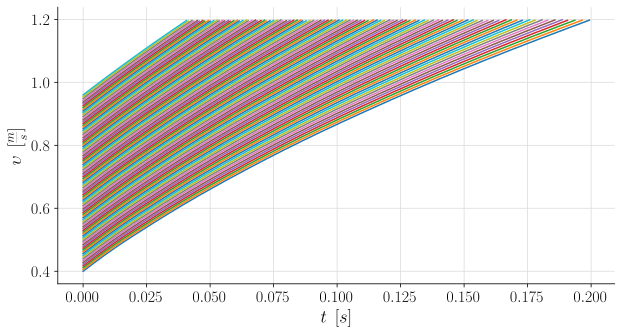

In [44]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

i = 0
u_array = []
time_array_2 = []
stop_solution_array = []
for V_0 in V_start:
    p = p_array[i]
    def V(t, alpha, V_0):
        return V_0 * (p_0 / p(t))**(1 / alpha)
    
    # plt.plot(solution.t, V(solution.t, alpha, V_0))
    stop = np.abs(np.array(V(solution.t, alpha, V_0)) - V_rocket).argmin()
    time = np.array(time_array[i])
    i += 1
    print(p(time[stop]))
    
    k = 1 / 2 * 1.25 * np.pi * (0.085 / 2)**2 * 0.3
    
    def du_dt(t, u, mu, alpha, S, V_0):
        if t < time[stop]:
            return (2 * mu**2 * S * (p(t) - p_a) - k * u**2) / (m_rocket + rho * (V_rocket - V(t, alpha, V_0))) - g
        elif t >= time[stop]:
            return -g - k * u**2 / m_rocket
    
    # Начальные условия
    t0 = 0
    u0 = 0
    
    t_span = (t0, tau)
    t_eval = np.linspace(t0, tau, N_step)
    
    solution = solve_ivp(du_dt, t_span, [u0], args=(mu, alpha, S, V_0), t_eval=t_eval, rtol=1e-6, atol=1e-9)

    u_array.append(solution.y[0])
    time_array_2.append(solution.t)
    stop_solution = np.abs(solution.y[0][100:]).argmin()
    stop_solution_array.append(stop_solution)
    # plt.plot(np.array(solution.t)[:stop_solution], solution.y[0][:stop_solution]) # [:stop_solution]
    # print(solution.t[stop_solution])
    plt.plot(np.array(solution.t)[:stop], V(solution.t, alpha, V_0)[:stop] * 1000)
    
    T_8 = np.load('T.npy')
    Vs_8 = np.load('Vs.npy')
    # plt.plot(T_8, Vs_8 / 1e3)
    
plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
# plt.ylabel(r'$V\:\:[l]$')
# plt.legend(V_start * 1e6)
plt.grid(color='gainsboro')

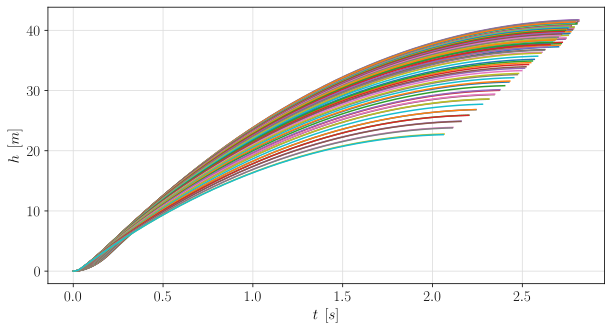

In [64]:
h_max = np.zeros(len(V_start))
flag_plot = 0
for j in range(len(V_start)):
    time = time_array_2[j]
    # x = np.zeros(len(time) - 1)
    u = u_array[j]
    u_interp = interp1d(time, u, kind='linear')
    def dx_dt(t, x):
        return u_interp(t)
    # for i in range(1, len(u) - 1):
    #     x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

    # Начальные условия
    t0 = 0
    x0 = 0
    
    # t_span = (t0, tau)
    # t_eval = np.linspace(t0, tau, N_step)
    t_span = (time.min(), time.max())
    t_eval = np.linspace(time.min(), time.max(), N_step)
    
    solution_x = solve_ivp(dx_dt, t_span, [x0], t_eval=t_eval, rtol=1e-6, atol=1e-9)

    h_max[j] = np.max(solution_x.y[0])
    # print(h_max[j])
    if flag_plot == 0:
        stop_solution = stop_solution_array[j]
        plt.plot(solution_x.t[:stop_solution], solution_x.y[0][:stop_solution])

if flag_plot == 1:
    plt.plot(V_start * 1e3, h_max, 'o')
    plt.xlabel(r'$V_0\:\:[l]$')
    plt.ylabel(r'$h_{max}\:\:[m]$')

if flag_plot == 0:
    plt.xlabel(r'$t\:\:[s]$')
    plt.ylabel(r'$h\:\:[m]$')
plt.grid(color='gainsboro')

# plt.savefig("h_vs_V0_16mm.pdf", bbox_inches='tight')

In [45]:
data_1 = np.load('D.npy')
data_2 = np.load('D_1.npy')

In [47]:
def make_data_combined(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=0             # Skip non-data header rows
    )
data_comb_1 = make_data_combined('combined_1.csv')
data_comb_2 = make_data_combined('combined_2.csv')
data_comb_1.head()

,Unnamed: 0,t,gx,gy,gz,ax,ay,az,mx,my,mz,P,h,track_x,track_y,track_z
0,0,-0.10,15.051270,13.330078,3.527832,-0.600391,-0.028711,-0.010059,2.506727,0.0,7.439494e-40,100222.695312,0.154505,2.614670,-0.908905,0.000000
1,1,-0.09,14.916992,13.439941,3.344727,-0.602637,-0.033984,-0.012500,2.506727,0.0,7.439634e-40,100222.734375,0.151415,2.610515,-0.911799,0.001754
2,2,-0.08,14.843750,13.500977,3.735352,-0.600000,-0.032813,-0.025781,2.506727,0.0,7.439774e-40,100223.025000,0.128424,2.622041,-0.922972,0.001074
3,3,-0.07,15.087891,13.562012,3.515625,-0.603418,-0.031445,-0.025781,2.506727,0.0,7.439914e-40,100223.971875,0.053520,2.630111,-0.930796,0.000597
4,4,-0.06,14.831543,13.659668,3.430176,-0.603027,-0.032617,-0.017187,2.506727,0.0,7.440054e-40,100225.246875,-0.047341,2.630111,-0.930796,0.000597


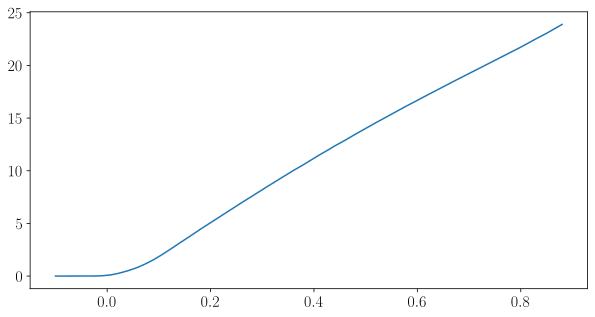

In [50]:
time_1 = data_comb_1["t"].to_numpy()
track_z_1 = data_comb_1["track_z"].to_numpy()
plt.plot(time_1, track_z_1)